In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from google.colab import files


In [5]:
!pip install -q kaggle


In [6]:
from google.colab import files
files.upload()   # upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veenamudupu","key":"8980dc08fa077e8909eced5f11dd9326"}'}

In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed
!unzip traffic-signs-preprocessed.zip -d gtsrb_data


Dataset URL: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-preprocessed
License(s): other
 99% 4.14G/4.16G [00:41<00:00, 64.7MB/s]
100% 4.16G/4.16G [00:41<00:00, 108MB/s] 
Archive:  traffic-signs-preprocessed.zip
  inflating: gtsrb_data/data0.pickle  
  inflating: gtsrb_data/data1.pickle  
  inflating: gtsrb_data/data2.pickle  
  inflating: gtsrb_data/data3.pickle  
  inflating: gtsrb_data/data4.pickle  
  inflating: gtsrb_data/data5.pickle  
  inflating: gtsrb_data/data6.pickle  
  inflating: gtsrb_data/data7.pickle  
  inflating: gtsrb_data/data8.pickle  
  inflating: gtsrb_data/datasets_preparing.py  
  inflating: gtsrb_data/label_names.csv  
  inflating: gtsrb_data/labels.pickle  
  inflating: gtsrb_data/mean_image_gray.pickle  
  inflating: gtsrb_data/mean_image_rgb.pickle  
  inflating: gtsrb_data/std_gray.pickle  
  inflating: gtsrb_data/std_rgb.pickle  
  inflating: gtsrb_data/test.pickle  
  inflating: gtsrb_data/train.pickle  
  inflating: gtsrb_data/valid.pic

In [9]:
import pickle

with open("gtsrb_data/train.pickle", "rb") as f:
    train_data = pickle.load(f)
with open("gtsrb_data/valid.pickle", "rb") as f:
    valid_data = pickle.load(f)
with open("gtsrb_data/test.pickle", "rb") as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test   = test_data['features'], test_data['labels']

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test:", X_test.shape, y_test.shape)


Train: (34799, 32, 32, 3) (34799,)
Valid: (4410, 32, 32, 3) (4410,)
Test: (12630, 32, 32, 3) (12630,)


In [10]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Normalize (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_valid = X_valid.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test  = to_categorical(y_test, num_classes)

print("Classes:", num_classes)


Classes: 43


In [12]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=X_train.shape[1:]),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=64
)


Epoch 1/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.4283 - loss: 2.1653 - val_accuracy: 0.8551 - val_loss: 0.4827
Epoch 2/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9412 - loss: 0.2185 - val_accuracy: 0.9052 - val_loss: 0.3509
Epoch 3/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9758 - loss: 0.0977 - val_accuracy: 0.9243 - val_loss: 0.2955
Epoch 4/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0562 - val_accuracy: 0.9324 - val_loss: 0.2827
Epoch 5/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9903 - loss: 0.0383 - val_accuracy: 0.9365 - val_loss: 0.2582
Epoch 6/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0350 - val_accuracy: 0.9379 - val_loss: 0.2767
Epoch 7/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9950 - loss: 0.0176 - val_accuracy: 0.9238 - val_loss: 0.2926
Epoch 8/10
544/544 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9931 - loss: 0.0239 - val_accuracy: 0.

In [14]:
import pandas as pd

# Load label names
label_names = pd.read_csv("gtsrb_data/label_names.csv")
print(label_names.head())


   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


Saving 12614.png to 12614.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prediction for 12614.png: Speed limit (20km/h)


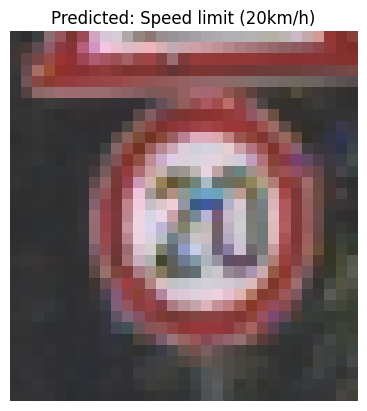

In [26]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()

for fn in uploaded.keys():
    # Load and preprocess uploaded image
    img = image.load_img(fn, target_size=(32, 32))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)
    pred_class = np.argmax(prediction)
    pred_label = label_names.loc[pred_class, "SignName"]

    # Print result
    print(f"Prediction for {fn}: {pred_label}")

    # Show image with prediction
    plt.imshow(image.load_img(fn))
    plt.title(f"Predicted: {pred_label}")
    plt.axis("off")
    plt.show()
